In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# plt.style.available
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Data Description

- `job_level` : Level Jabatan Pekerja
- `job_duration_in_current_job_level` : Masa Kerja pada job level saat ini
- `person_level` : Level personal Pekerja
- `job_duration_in_current_person_level` : Masa Kerja pada person level saat ini
- `job_duration_in_current_branch` : Masa Kerja pada unit kerja saat ini
- `Employee_type` : Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)
- `gender` : Jenis Kelamin
- `age` : Usia
- `marital_status_maried(Y/N)` : Status Pernikahan (Y / N)
- `number_of_dependences` : Jumlah anak dalam tanggungan
- `Education_level` : Tingkat pendidikan
- `GPA` : IPK
- `year_graduated` : Tahun lulus
- `job_duration_from_training` : lama bekerja mulai dari training
- `branch_rotation` : Jumlah rotasi pindah unit kerja
- `job_rotation` : jumlah rotasi pindah jabatan
- `assign_of_otherposition` : jumlah rotasi penugasan
- `annual leave` : jumlah cuti tahunan
- `sick_leaves` : jumlah izin sakit
- `Last_achievement_%` : presentase pencapaian triwulan terakhir terhadap target
- `Achievement_above_100%_during3quartal` : Jumlah pencapaian diatas 100% dalam 3 tahun terkahir
- `Best Performance` : Termasuk dalam best performance (1/0)

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


# Exploratory Data Analysis

In [4]:
summary = []

for col in df_train.columns:
    summary.append([col, df_train[col].dtype, df_train[col].isnull().sum(),
                   round(df_train[col].isnull().sum()/len(df_train)*100,2), 
                   df_train[col].nunique(), list(df_train[col].sample(5).drop_duplicates().values)
                   ])
    
df_summary = pd.DataFrame(summary, columns='column dtype null null_Pct nunique sample'.split(" "))
df_summary

,column,dtype,null,null_Pct,nunique,sample
0,job_level,object,0,0.00,3,[JG04]
1,job_duration_in_current_job_level,float64,0,0.00,97,"[2.82842712474619, 1.3527749258468702, 1.25698..."
2,person_level,object,0,0.00,8,[PG03]
3,job_duration_in_current_person_level,float64,0,0.00,72,"[1.3856406460551, 1.15325625946708, 2.54950975..."
4,job_duration_in_current_branch,float64,0,0.00,69,"[1.15325625946708, 0.707106781186548, 1.682260..."
5,Employee_type,object,0,0.00,3,[RM_type_A]
6,gender,int64,0,0.00,2,[2]
7,age,int64,0,0.00,35,"[1990, 1988, 1984]"
8,marital_status_maried(Y/N),object,0,0.00,2,[Y]
9,number_of_dependences,int64,0,0.00,7,"[1, 2]"


## Checking Null Values

In [5]:
df_train.loc[df_train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [6]:
df_train.loc[df_train['Achievement_above_100%_during3quartal'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [7]:
# Drop null value
df_train.dropna(inplace=True)

## Check Duplicate Data

In [8]:
df_train[df_train.duplicated()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance


##  Data Analysis / Filtering

### `job_level`

In [9]:
df_train['job_level'].value_counts()

JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

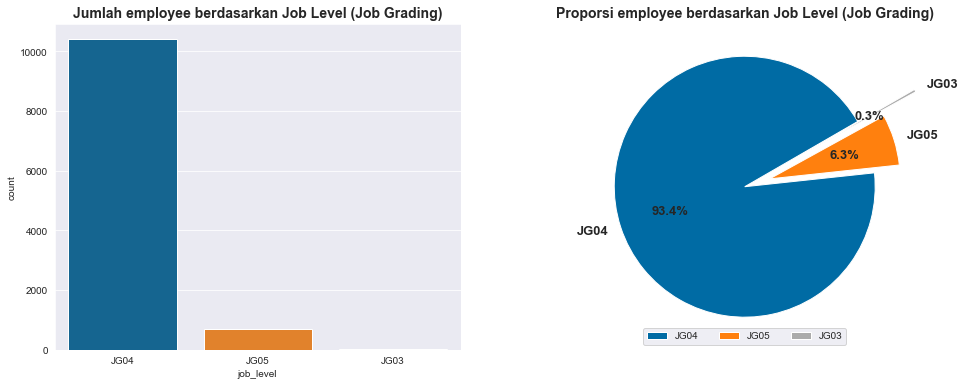

In [10]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee berdasarkan Job Level (Job Grading)', fontsize=14, fontweight='bold')
sns.countplot(df_train['job_level'])
plt.subplot(122)
plt.title('Proporsi employee berdasarkan Job Level (Job Grading)', fontsize=14, fontweight='bold')
plt.pie(df_train['job_level'].value_counts(), 
       autopct='%.1f%%', labels=df_train['job_level'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, explode=[0,0.2,0.5], startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

**Analisis data dilakukan berdasarkan `job_level` (Job Grading) untuk mengetahui karakteristik dari masing-masing job grading. Sekaligus dilakukan data filtering / data selection**.

### `job_duration_in_current_job_level`

Masa Kerja pada job level (Job Grading) saat ini

In [11]:
df_train['job_duration_in_current_job_level'].value_counts()

1.352775    1517
1.385641    1424
1.224745     902
1.322876     841
1.256981     736
            ... 
1.754993       1
2.019901       1
2.958040       1
2.102380       1
2.061553       1
Name: job_duration_in_current_job_level, Length: 97, dtype: int64

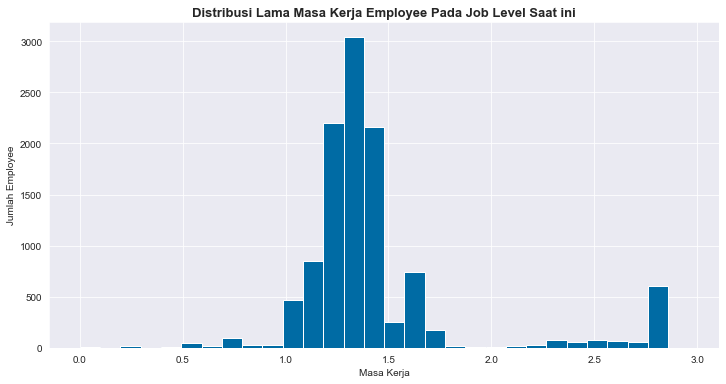

In [12]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Job Level Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_job_level'].hist(bins=30)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

- Masa Kerja Employee Pada Job Levelnya saat ini, mayoritas terdistiribusi pada durasi 1.2 - 1.4 tahun

In [13]:
JG = ['JG03','JG04','JG05']
# color=['tab:blue','tab:orange','tab:green']

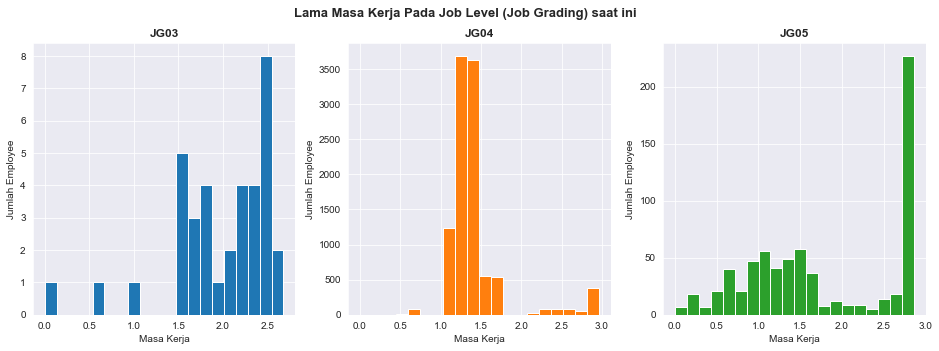

In [14]:
plt.figure(figsize=(16,5))
plt.suptitle('Lama Masa Kerja Pada Job Level (Job Grading) saat ini', fontsize=13, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['job_duration_in_current_job_level'].hist(bins=20, color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

- Lama Masa Kerja employee `JG03` pada job level tersebut, mayoritas terdistribusi  pada 1.5 - 1.9 dan 2.2 - 2.5 tahun
- Lama Masa Kerja employee `JG04` pada job level tersebut, mayoritas terdistribusi  pada 1.2 - 1.4 tahun
- Lama Masa Kerja employee `JG05` pada job level tersebut, mayoritas terdistribusi  pada 1 - 1.5 dan 2.9 tahun

### `person_level`

Level personal Pekerja

In [1]:
df_train['person_level'].value_counts()

NameError: name 'df_train' is not defined

In [ ]:
df_train['person_level'].sort_values()

In [ ]:
df_train['person_level'].value_counts().sort_index()

In [ ]:
df_train['person_level'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Person Level', fontsize=14, fontweight='bold')
sns.countplot(df_train['person_level'])
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Person Level', fontsize=14, fontweight='bold')
plt.pie(df_train['person_level'].value_counts(), autopct='%.0f%%', startangle=30, 
       labels=df_train['person_level'].value_counts().index, explode=[0.35,0.25,0.15,0.1,0,0,0,0],
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Person Level Berdasarkan Job Level nya', fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['person_level'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['person_level'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['person_level'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### `Job_duration_in_current_person_level`

Masa Kerja pada person level saat ini

In [ ]:
df_train['job_duration_in_current_person_level'].value_counts()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Person Level Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_person_level'].hist(bins=30)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

Mayoritas Employee Bekerja selama 1.2 - 1.4 tahun dengan status person levelnya saat ini

In [ ]:
PG = df_train['person_level'].value_counts().index.sort_values()
PG

In [ ]:
df_train[df_train['person_level']=='PG01']['job_duration_in_current_person_level']

In [ ]:
plt.figure(figsize=(16,9))
plt.suptitle('Lama Masa Kerja Pada Person Level (Personal Grade) saat ini', fontsize=13, fontweight='bold')
for i in range(len(PG)):
    plt.subplot(2,4,i+1)
    plt.title(PG[i], fontweight='bold')
    df_train[df_train['person_level']==PG[i]]['job_duration_in_current_person_level'].hist(bins=20, color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')

plt.show()

### `job_duration_in_current_branch`

Masa Kerja pada unit kerja saat ini

In [ ]:
df_train['job_duration_in_current_branch']

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Masa Kerja Employee Pada Unit Kerjanya (Branch) Saat ini', fontsize=13, fontweight='bold')
df_train['job_duration_in_current_branch'].hist(bins=20)
plt.xlabel('Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

### Employee Type

Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)

In [ ]:
df_train['Employee_type'].value_counts()

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Tipe Pekerja\n (Relationship Manager)', fontsize=14, fontweight='bold')
sns.countplot(df_train['Employee_type'].sort_values())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Tipe Pekerja\n (Relationship Manager)', fontsize=14, fontweight='bold')
plt.pie(df_train['Employee_type'].value_counts(), autopct='%.0f%%', startangle=30, 
       labels=df_train['Employee_type'].value_counts().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tipe Pekerja (Relationship Manager)\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['Employee_type'].sort_values())
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['Employee_type'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['Employee_type'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### Gender

Jenis Kelamin

In [ ]:
df_train['gender'].value_counts()

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Gender', fontsize=14, fontweight='bold')
sns.countplot(df_train['gender'].sort_values())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Gender', fontsize=14, fontweight='bold')
plt.pie(df_train['gender'].value_counts().sort_values(), autopct='%.0f%%', startangle=90, 
       labels=df_train['gender'].value_counts().sort_values().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

### Umur

Usia

In [ ]:
df_train['age']

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Umur Employee Pada Tahun 2021', fontsize=13, fontweight='bold')
(2021-df_train['age']).hist(bins=20)
plt.xlabel('Umur')
plt.xlabel('Jumlah Employee')
plt.show()

### marital_status_married(Y/N)

Status Pernikahan (Y / N)

In [ ]:
df_train['marital_status_maried(Y/N)'].value_counts()

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
sns.countplot(df_train['marital_status_maried(Y/N)'].sort_values(ascending=False))
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
plt.pie(df_train['marital_status_maried(Y/N)'].value_counts().sort_values(ascending=False), 
        autopct='%.0f%%', startangle=90, 
       labels=df_train['marital_status_maried(Y/N)'].value_counts().sort_values(ascending=False).index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

In [ ]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Marital Status Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'].value_counts(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['marital_status_maried(Y/N)'].value_counts().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### number_of_dependences

Jumlah anak dalam tanggungan

In [ ]:
df_train['number_of_dependences'].value_counts()

In [ ]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tanggungan Anak Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['number_of_dependences'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['number_of_dependences'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['number_of_dependences'].value_counts().sort_index().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

### Education_level

Tingkat Pendidikan

In [ ]:
df_train['Education_level'].value_counts()

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Jumlah Employee Berdasarkan Tingkat Pendidikan', fontsize=14, fontweight='bold')
sns.countplot(df_train['Education_level'].sort_index())
plt.subplot(122)
plt.title('Proporsi Jumlah Employee Berdasarkan Marital Status', fontsize=14, fontweight='bold')
plt.pie(df_train['Education_level'].value_counts().sort_index(), 
        autopct='%.0f%%', startangle=90, 
       labels=df_train['Education_level'].value_counts().sort_index().index,
       textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
plt.legend(loc='lower center', ncol=4)
plt.show()

**Hipotesis**

- level_0 : SMA
- level_1 : D1
- level_2 : D2
- level_3 : D3
- level_4 : D4 / S1
- level_5 : S2

In [2]:
plt.figure(figsize=(16,10))
plt.suptitle('Jumlah dan Proporsi Tingkat Pendidikan Employee\n Berdasarkan Job Level nya', 
             fontsize=14, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(2,3,i+1)
    plt.title(JG[i], fontweight='bold', fontsize=13)
    sns.countplot(df_train[df_train['job_level']==JG[i]]['Education_level'])
    plt.subplot(2,3,i+4)
    plt.pie(df_train[df_train['job_level']==JG[i]]['Education_level'].value_counts().sort_index(), 
            autopct='%.1f%%', startangle=30, 
            labels=df_train[df_train['job_level']==JG[i]]['Education_level'].value_counts().sort_index().index, 
            textprops={'color':'white', 'fontweight':'bold', 'fontsize':11})
    plt.legend(loc='lower center', ncol=4)

NameError: name 'plt' is not defined

### GPA

IPK

In [ ]:
df_train['GPA'].value_counts()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
df_train['GPA'].hist(bins=20)
plt.xlabel('IPK')
plt.xlabel('Jumlah Employee')
plt.show()

Distribusi nilai IPK di atas tidak normal. Karena nilai Maksimum IPK adalah 4.00

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
plt.boxplot(df_train['GPA'])
plt.ylabel('IPK')
plt.show()

Checking nilai IPK diatas 4.00

In [ ]:
df_train[df_train['GPA']>4.00]['GPA'].sort_values(ascending=False)

Nilai IPK tersebut tidak normal. Asumsi adalah nilai-nilai IPK tersebut salah input.

In [ ]:
# Check siapa saja yang memiliki IPK diatas 4.00. lihat kolom Best Performance
df_train[df_train['GPA']>4.00]['Best Performance'].value_counts()

In [ ]:
# Check siapa saja yang memiliki IPK diatas 4.00. lihat kolom job level
df_train[df_train['GPA']>4.00]['job_level'].value_counts()

In [ ]:
#Check Prosentase data IPK yang salah input
print(f"Jumlah baris data yang kemungkinan salah input IPK : {len(df_train[df_train['GPA']>4.00])}")
print(f"Presentase jumlah baris data yang kemungkinan salah input IPK : {round((len(df_train[df_train['GPA']>4.00])/len(df_train)*100),2)}%")


**Presentase salah inputnya sangat kecil dibandingkan junlah data keseluruhan. Hanya 0.47%. Data tersebut bisa kita drop**

In [ ]:
data_gpa = df_train[df_train['GPA']<=4.00]

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
data_gpa['GPA'].hist(bins=20)
plt.xlabel('IPK')
plt.ylabel('Jumlah Employee')
plt.show()

Setelah tidak mengikutsertakan data yang kemungkinan salah input pada kolom IPK, didapatkan insight berupa terdapat 2000an Employee yng memiliki IPK di bawah 1 atau mendekati 0

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi IPK Employee', fontsize=13, fontweight='bold')
plt.boxplot(data_gpa['GPA'])
plt.ylabel('IPK')
plt.show()

In [ ]:
#Check berapa banyak yang memiliki IPK di bawah 1
data_gpa[data_gpa['GPA']<1]['GPA'].value_counts()

In [ ]:
# Check siapa saja yang memiliki IPK diatas 4.00. lihat kolom Best Performance
df_train[df_train['GPA']<1.00]['Best Performance'].value_counts()

In [ ]:
# Check siapa saja yang memiliki IPK diatas 4.00. lihat kolom job level
df_train[df_train['GPA']<1.00]['job_level'].value_counts()

In [ ]:
#Check Prosentase data IPK yang salah input
print(f"Jumlah baris data yang kemungkinan salah input IPK : {len(data_gpa[data_gpa['GPA']<1.00])}")
print(f"Presentase jumlah baris data yang kemungkinan salah input IPK : {round((len(df_train[df_train['GPA']<1.00])/len(df_train)*100),2)}%")


**Ada 19.27% Employee yang memiliki IPK 0.0 atau 0.3** 

Data tersebut tidak normal. Namun jika dilakukan dropping. maka kita akan kehilangan cukup banyak data. sekitar 19% data akan hilang

**Kita lakukan analisa visual data kolom IPK dengan tidak menyertakan data yang salah input dan menyertakan data IPK 0.0 dan 0.3**

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi nilai IPK Employee Berdasarkan job_level', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    data_gpa[data_gpa['job_level']==JG[x]]['GPA'].hist(bins=20, color=color[x])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

**Kita lakukan analisa visual data kolom IPK dengan tidak menyertakan data yang salah input data IPK 0.0 & 0.3**

In [ ]:
normal_gpa = df_train[(df_train['GPA']<=4.00) & (df_train['GPA']>1.00)]
normal_gpa['GPA'].describe()

In [ ]:
plt.figure(figsize=(16,6.5))
plt.suptitle('Distribusi nilai IPK Employee Berdasarkan job_level\n (Diluar data IPK >4 & 0)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    normal_gpa[normal_gpa['job_level']==JG[x]]['GPA'].hist(bins=20, color=color[x])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

In [3]:
plt.figure(figsize=(16,6.5))
plt.suptitle('Boxplot nilai IPK Employee Berdasarkan job_level\n (Diluar data IPK >4 & 0)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    plt.boxplot(normal_gpa[normal_gpa['job_level']==JG[x]]['GPA'])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

NameError: name 'plt' is not defined

In [ ]:
jg03_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG03']['GPA']
jg03_normal_gpa.describe()

In [ ]:
jg04_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG04']['GPA']
jg04_normal_gpa.describe()

In [ ]:
jg05_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG05']['GPA']
jg05_normal_gpa.describe()

### Job Duration From Training

Lama bekerja mulai dari training

In [ ]:
df_train['job_duration_from_training']

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Lama Kerja Employee Mulai dari Training', fontsize=13, fontweight='bold')
df_train['job_duration_from_training'].hist(bins=20)
plt.xlabel('Lama Masa Kerja')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Lama Bekerja dari Training Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['job_duration_from_training'].hist(bins=15,color=color[i])
    plt.xlabel('Masa Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

### Branch Rotation

Jumlah rotasi pindah unit kerja

In [ ]:
df_train['branch_rotation'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Pindah Unit Kerja Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['branch_rotation'].value_counts().sort_index().index, 
        df_train['branch_rotation'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Pindah Unit Kerja (Cabang)')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Pindah Unit Kerja Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['branch_rotation'].hist(bins=15,color=color[i])
    plt.xlabel('Jumlah Rotasi Unit Kerja')
    plt.ylabel('Jumlah Employee')
plt.show()

### Job Rotation

Jumlah rotasi pindah jabatan

In [ ]:
df_train['job_rotation'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Pindah Jabatan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['job_rotation'].value_counts().sort_index().index, 
        df_train['job_rotation'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Pindah Jabatan')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Pindah Jabatan Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['job_rotation'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['job_rotation'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Jabatan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Assign Other Position

Jumlah rotasi penugasan

In [ ]:
df_train['assign_of_otherposition'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Rotasi Penugasan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['assign_of_otherposition'].value_counts().sort_index().index, 
        df_train['assign_of_otherposition'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Rotasi Penugasan')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Rotasi Penugasan Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['assign_of_otherposition'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['assign_of_otherposition'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Penugasan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Annual Leave

Jumlah Cuti Tahunan

In [ ]:
df_train['annual leave'].value_counts().sort_index()

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Jumlah Cuti Tahunan Employee', fontsize=13, fontweight='bold')
plt.bar(df_train['annual leave'].value_counts().sort_index().index, 
        df_train['annual leave'].value_counts().sort_index().values,
       color=color)
plt.xlabel('Jumlah Cuti')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Cuti Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    plt.bar(df_train[df_train['job_level']==JG[i]]['annual leave'].value_counts().index,
            df_train[df_train['job_level']==JG[i]]['annual leave'].value_counts().values,color=color[i])
    plt.xlabel('Jumlah Rotasi Penugasan')
    plt.ylabel('Jumlah Employee')
plt.show()

### Sick Leaves

Jumlah Izin Sakit

In [ ]:
df_train['sick_leaves']

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Jumlah Izin sakit Employee', fontsize=13, fontweight='bold')
df_train['sick_leaves'].hist(bins=20)
plt.xlabel('Jumlah Izin Sakit')
plt.ylabel('Jumlah Employee')
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribusi Jumlah Izin Sakit Employee Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)):
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['sick_leaves'].hist(bins=20,color=color[i])
    plt.xlabel('Jumlah Izin Sakit')
    plt.ylabel('Jumlah Employee')
plt.show()

### Last Achievement

Presentase pencapaian triwulan terakhir terhadap target

In [4]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Capaian Kerja Employee Terhadap Target\n Triwulan Terkahir', fontsize=13, fontweight='bold')
df_train['Last_achievement_%'].hist(bins=20)
plt.xlabel('Capaian Kinerja (dalam %)')
plt.ylabel('Jumlah Employee')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Capaian Kinerja Employee', fontsize=13, fontweight='bold')
plt.boxplot(df_train['Last_achievement_%'])
plt.ylabel('Capaian Kinerja %')
plt.show()
plt.show()

In [ ]:
plt.figure(figsize=(16,7))
plt.suptitle('Distribusi Pesentase Pencapaian Triwulan Terakhir Terhadap Target (1 Tahun)\n Berdasarkan job_level', fontsize=16, fontweight='bold')
for i in range(len(JG)) :
    plt.subplot(1,3,i+1)
    plt.title(JG[i], fontweight='bold')
    df_train[df_train['job_level']==JG[i]]['Last_achievement_%'].hist(bins=20,color=color[i])
    plt.xlabel('Capaian Kinerja %')
    plt.ylabel('Jumlah Employee')

Employee Dengan Capaian **Kinerja 100%**

In [ ]:
employee_100 = df_train[df_train['Last_achievement_%']==100.00]
employee_100

Employee Dengan Capaian **Kinerja diatas 100 %**

In [ ]:
employee_above_100 = df_train[df_train['Last_achievement_%']>100]
employee_above_100['Last_achievement_%'].describe()

In [ ]:
print(f'Jumlah Employee dengan kinerja diatas 100% berjumlah {len(employee_above_100)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja diatas 100% : {round((len(employee_above_100)/len(df_train)*100),2)}%' )

In [ ]:
#Employee dengan capaian kinerja tertingi
employee_above_100[employee_above_100['Last_achievement_%']==130.00].T

In [ ]:
employee_above_100['job_level'].value_counts()

In [ ]:
employee_above_100['job_duration_from_training'].value_counts().sort_values()

Employee dengan **kinerja 80 - 99 %**

In [ ]:
employee_80_99 = df_train[(df_train['Last_achievement_%']>=80) & (df_train['Last_achievement_%']<100)]

In [ ]:
employee_80_99['Last_achievement_%'].describe()

In [ ]:
print(f'Jumlah Employee dengan kinerja 80-99% berjumlah {len(employee_80_99)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja 80-99% : {round((len(employee_80_99)/len(df_train)*100),2)}%' )

In [ ]:
employee_80_99['job_level'].value_counts()

Employee dengan **kinerja 60 - 79 %**

In [ ]:
employee_60_79 = df_train[(df_train['Last_achievement_%']>=60) & (df_train['Last_achievement_%']<80)]

In [ ]:
employee_60_79['Last_achievement_%'].describe()

In [ ]:
print(f'Jumlah Employee dengan kinerja 80-99% berjumlah {len(employee_60_79)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja 80-99% : {round((len(employee_60_79)/len(df_train)*100),2)}%' )

In [ ]:
employee_60_79['job_level'].value_counts()

Employee dengan **kinerja dibawah 60%**

In [ ]:
employee_below_60 = df_train[df_train['Last_achievement_%']<60]

In [ ]:
employee_below_60['Last_achievement_%'].describe()

In [5]:
#Employee dengan capaian kinerja terendah
employee_below_60[employee_below_60['Last_achievement_%']==4.51].T

NameError: name 'employee_below_60' is not defined

In [ ]:
print(f'Jumlah Employee dengan kinerja di bawah 60% berjumlah {len(employee_below_60)} orang dari total {len(df_train)} jumlah employee')
print(f'Presentase Jumlah Employee dengan capaian Kinerja di bawah 60% : {round((len(employee_below_60)/len(df_train)*100),2)}%' )

In [ ]:
employee_below_60['job_level'].value_counts()

In [ ]:
print(len(employee_below_60))
print(len(employee_60_79))
print(len(employee_80_99))
print(len(employee_100))
print(len(employee_above_100))
print()
print(f'Total : {len(employee_below_60)+len(employee_60_79)+len(employee_80_99)+len(employee_100)+len(employee_above_100)}')
print(f'Data : {len(df_train)}')

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Presentase Capaian Kinerja Employe', fontsize=13, fontweight='bold')
size=[len(employee_below_60),len(employee_60_79), 
     len(employee_80_99), len(employee_100), len(employee_above_100)]

label=['below_60%', '60-79%', '80-99%', '100%', 'above_100%']

plt.pie(size, autopct='%.2f%%')
plt.legend(label, loc='lower center', ncol=3)
plt.show()

### `Achievement_above_100%_during3quartal`

Jumlah pencapaian diatas 100% dalam 3 tahun terkahir

Penamaan Kolom di atas tidak konsisten dengan deskripsinya. Mungkin yang dimaksud ada sesuai dengan deskripsinya

In [ ]:
df_train['Achievement_above_100%_during3quartal'].value_counts()

- 0 : Tidak pernah mencapain kinerja di atas 100% sama sekali dalam kurun waktu 3 tahun terakhir
- 1 : Mencapai kinerja di atas 100% sebanyak **satu kali** dalam kurun waktu 3 tahun terakhir
- 2 : Mencapai kinerja di atas 100% sebanyak **dua kali** dalam kurun waktu 3 tahun terakhir
- 3 : Mencapai kinerja di atas 100% sebanyak **3 kali** dalam kurun waktu 3 tahun terakhir 

In [ ]:
# Check apakah 0 benar tidak pernah mencapai kinerja di atas 100 %
df_train[df_train['Achievement_above_100%_during3quartal']==0]['Last_achievement_%'].max()

In [ ]:
# Check apakah 1 benar pernah mencapai kinerja di atas 100 % setidaknya 1 kali
df_train[df_train['Achievement_above_100%_during3quartal']==1]['Last_achievement_%']

In [ ]:
# Check apakah 2 benar pernah mencapai kinerja di atas 100 % setidaknya 2 kali
df_train[df_train['Achievement_above_100%_during3quartal']==2]['Last_achievement_%']

In [ ]:
# Check apakah 3 benar pernah mencapai kinerja di atas 100 % selama 3 tahun berturut-turut
df_train[df_train['Achievement_above_100%_during3quartal']==3]['Last_achievement_%']

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee dengan kinerja di atas 100% dalam 3 tahun terakhir', fontsize=14, fontweight='bold')
sns.countplot(df_train['Achievement_above_100%_during3quartal'])
plt.subplot(122)
plt.title('Jumlah employee dengan kinerja di atas 100% dalam 3 tahun terakhir', fontsize=14, fontweight='bold')
plt.pie(df_train['Achievement_above_100%_during3quartal'].value_counts().sort_index(), 
       autopct='%.1f%%', labels=df_train['Achievement_above_100%_during3quartal'].value_counts().sort_index().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

Check siapa employee yang mencapai target kinerja di atas 100 % 3 tahun terakhir & mencapai target di atas 100% pada tahun ini

In [ ]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]

In [ ]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]['Last_achievement_%'].describe()

In [ ]:
df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]['Achievement_above_100%_during3quartal'].value_counts()

**Ada 1041 employee yang mencapai target kinerja di atas 100 % 3 tahun terakhir & mencapai target di atas 100% pada triwulan akhir**

### `Best Performance`

Termasuk dalam best performance (1/0)

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
sns.countplot(df_train['Best Performance'])
plt.subplot(122)
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

In [ ]:
best_employee = df_train[(df_train['Achievement_above_100%_during3quartal']==3) & (df_train['Last_achievement_%']>100.00)]
best_employee

In [ ]:
best_employee['Best Performance'].value_counts()

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Jumlah employee dengan kinerja selalu di atas 100%\n dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
sns.countplot(best_employee['Best Performance'])
plt.subplot(122)
plt.title('Proporsi Jumlah employee dengan kinerja selalu di atas 100%\n dengan Kategori "Best Performance"', 
          fontsize=14, fontweight='bold')
plt.pie(best_employee['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=best_employee['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold', 'color':'white'}, startangle=30)

plt.legend(loc='lower center', ncol=3)
plt.show()

In [6]:
df_train[df_train['Best Performance']==1]

NameError: name 'df_train' is not defined

In [ ]:
df_train[['Last_achievement_%', 'Achievement_above_100%_during3quartal']].corrwith(df_train['Best Performance'])

In [ ]:
df_train[df_train['GPA']==0]['Best Performance'].value_counts()

In [ ]:
df_train[df_train['GPA']>4.00]['Best Performance'].value_counts()

# Dummy Variables

In [123]:
# jg = pd.get_dummies(df_train['job_level'], drop_first=True)
# jg.head()

In [124]:
# pg = pd.get_dummies(df_train['person_level'], drop_first=True)
# pg.head()

In [125]:
# emp_type = pd.get_dummies(df_train['Employee_type'], drop_first=True)
# emp_type.head()

In [126]:
# gender = pd.get_dummies(df_train['gender'],drop_first=True)

In [127]:
# gender

In [128]:
# marital = pd.get_dummies(df_train['marital_status_maried(Y/N)'],drop_first=True)
# marital

In [129]:
# edu = pd.get_dummies(df_train['Education_level'], drop_first=True)
# edu

In [130]:
# dum = pd.concat([jg,pg,emp_type,gender,marital,edu], axis=1)
# dum

# Statsmodels

In [131]:
# X = df_train.drop(['job_level', 'person_level', 'Employee_type',
#                    'gender','marital_status_maried(Y/N)', 
#                    'Education_level','Best Performance'], axis=1)

In [132]:
# X = pd.concat([dum,X],axis=1)

In [133]:
# y = df_train[['Best Performance']]

In [134]:
# X

In [135]:
# y['Best Performance'].value_counts()

In [136]:
# from imblearn.over_sampling import SMOTE

In [137]:
# smote = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
# Xsmot, ysmot = smote.fit_sample(X,y)

In [138]:
# Xsmot.shape

In [139]:
# ysmot['Best Performance'].value_counts()

In [140]:
# len(X.columns)

In [141]:
# X.dtypes

In [142]:
# import statsmodels.api as sm
# sm_log = sm.Logit(y, sm.add_constant(X))

In [143]:
# result = sm_log.fit()

In [144]:
# print(result.summary())

In [145]:
# sm_log_2 = sm.Logit(ysmot, sm.add_constant(Xsmot))
# result_2 = sm_log_2.fit()

In [146]:
# print(result_2.summary())

## GPA Manipulation

In [147]:
# normal_gpa

In [148]:
wrong_gpa=df_train[(df_train['GPA']>4.00) | (df_train['GPA']<1.00)]
wrong_gpa.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,...,1990,28,7,9,4,0,0,48.46,0.0,0


In [149]:
jg03_normal_gpa.describe()

count    29.000000
mean      3.095172
std       0.232389
min       2.800000
25%       2.870000
50%       3.080000
75%       3.200000
max       3.630000
Name: GPA, dtype: float64

In [150]:
jg04_normal_gpa.describe()

count    8413.000000
mean        3.164201
std         0.239812
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [151]:
jg05_normal_gpa.describe()

count    509.000000
mean       3.110747
std        0.277930
min        2.050000
25%        2.960000
50%        3.110000
75%        3.280000
max        3.860000
Name: GPA, dtype: float64

In [152]:
# Make data Copy
df_train_copy = df_train.copy()

In [153]:
df_train_copy.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
Best Performance                         0
dtype: int64

In [154]:
wrong_gpa[wrong_gpa['job_level']=='JG03']['GPA']

2167    0.0
2572    0.0
2624    0.0
4258    0.0
5365    0.0
7426    0.0
7898    0.0
Name: GPA, dtype: float64

In [155]:
def fixing_gpa(x):
    jg = x[0]
    gpa = x[1]
    
    if gpa > 4.00 or gpa < 0.50:
        if jg == 'JG03':
            return 3.08
        elif jg == 'JG04':
            return 3.14
        elif jg == 'JG05':
            return 3.11
    else:
        return gpa

In [156]:
df_train_copy['GPA'] = df_train_copy[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [157]:
df_train_copy[df_train_copy['job_level']=='JG03']['GPA']

386      3.26
401      2.99
820      3.00
845      2.80
1184     2.80
1270     2.85
1337     2.87
1589     3.34
1754     3.15
1879     2.81
1890     3.13
1978     2.95
2167     3.08
2503     3.20
2572     3.08
2624     3.08
2948     3.18
2999     3.34
3016     3.07
3557     2.80
3569     3.63
4258     3.08
5137     3.00
5290     3.53
5365     3.08
5392     2.87
6961     3.11
7426     3.08
7898     3.08
7953     3.09
8688     3.50
8711     3.08
8777     3.07
9061     3.33
10072    2.81
11074    3.20
Name: GPA, dtype: float64

In [158]:
# Create Dummy Variable

In [159]:
# jg = pd.get_dummies(df_train_copy['job_level'],drop_first=True)
# pg = pd.get_dummies(df_train_copy['person_level'],drop_first=True)
# emp_type = pd.get_dummies(df_train_copy['Employee_type'],drop_first=True)
# gender = pd.get_dummies(df_train_copy['gender'],drop_first=True)
# marital = pd.get_dummies(df_train_copy['marital_status_maried(Y/N)'],drop_first=True)
# edu = pd.get_dummies(df_train_copy['Education_level'],drop_first=True)

In [160]:
# dummy = pd.concat([jg,pg,emp_type,gender,marital,edu], axis=1)
# dummy

In [161]:
# df_train_copy.drop(['job_level', 'person_level', 'Employee_type',
#                    'gender','marital_status_maried(Y/N)', 
#                    'Education_level'], axis=1, inplace=True)

In [162]:
# df_train_copy.shape

In [163]:
# data = pd.concat([dummy,df_train_copy], axis=1)
# data

In [164]:
# data.corr()['Best Performance']

In [165]:
# X = data.drop('Best Performance',axis=1)
# y = data['Best Performance']

In [166]:
# y.value_counts()

In [167]:
# X.head()

In [168]:
# X.shape

In [169]:
# #Statsmodels
# import statsmodels.api as sm

In [170]:
# sm_log = sm.Logit(y, sm.add_constant(X))
# result = sm_log.fit()
# print(result.summary())

In [171]:
# X_gpa = X[['job_duration_in_current_branch']]

In [172]:
# smx = sm.Logit(y, sm.add_constant(X_gpa))
# res = smx.fit()
# print(res.summary())

In [173]:
# #Statsmodels with oversampling
# from imblearn.over_sampling import SMOTE
# smot = SMOTE(random_state=42)

In [174]:
# Xsmot, ysmot = smot.fit_resample(X,y)

In [175]:
# sm_log_smot = sm.Logit(ysmot, sm.add_constant(Xsmot))
# result2 = sm_log_smot.fit()
# print(result2.summary())

# Train Test Split

In [176]:
# from sklearn.model_selection import train_test_split, cross_val_score

In [177]:
# Xsmot

In [178]:
# ysmot

In [179]:
# X_train, X_test, y_train, y_test = train_test_split(Xsmot,ysmot, test_size=0.3, random_state=42)

## Modelling

In [180]:
# from sklearn.linear_model import LogisticRegression

In [181]:
# logreg = LogisticRegression()
# logreg.fit(X_train,y_train)

In [182]:
# y_train.value_counts()

In [183]:
# pred = logreg.predict(X_test)
# pred

In [184]:
# proba = logreg.predict_proba(X_test)
# proba

In [185]:
# from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [186]:
# print(confusion_matrix(y_test, pred))

In [187]:
# plt.figure(figsize=(12,8))
# plot_confusion_matrix(logreg,X_test,y_test,values_format='d')

In [188]:
# print(classification_report(y_test,pred))

In [189]:
# cv_score = cross_val_score(logreg,X_test,y_test,cv=10).mean()

## Try Model with oversampling X_train, y_train

In [190]:
# X.shape

In [191]:
# y.shape

In [192]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [193]:
# X_train.shape

In [194]:
# y_train.shape

In [195]:
# smot = SMOTE()

In [196]:
# X_train_smot, y_train_smot = smote.fit_resample(X_train, y_train)

In [197]:
# X_train_smot.shape

In [198]:
# y_train_smot.shape

In [199]:
# logreg2 = LogisticRegression()
# logreg2.fit(X_train_smot,y_train_smot)

In [200]:
# pred2 = logreg2.predict(X_test)
# pred2

In [201]:
# proba2 = logreg2.predict_proba(X_test)
# proba2

In [202]:
# print(confusion_matrix(y_test,pred2))

In [203]:
# plt.figure(figsize=(12,8))
# plot_confusion_matrix(logreg2,X_test,y_test,values_format='d')

In [204]:
# print(classification_report(y_test,pred2))

## Try Modelling with p-value <0.05

In [205]:
# X

# Import Data Test

In [206]:
# df_test = pd.read_csv('test.csv')
# df_test

In [207]:
# df_test.isnull().sum()

In [208]:
# df_test['GPA'] = df_test[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [209]:
# # Create Dummy Variable for data test

# jg_test = pd.get_dummies(df_test['job_level'],drop_first=True)
# pg_test = pd.get_dummies(df_test['person_level'],drop_first=True)
# emp_type_test = pd.get_dummies(df_test['Employee_type'],drop_first=True)
# gender_test = pd.get_dummies(df_test['gender'],drop_first=True)
# marital_test = pd.get_dummies(df_test['marital_status_maried(Y/N)'],drop_first=True)
# edu_test = pd.get_dummies(df_test['Education_level'],drop_first=True)

# dummy_test = pd.concat([jg_test,pg_test,emp_type_test,gender_test,marital_test,edu_test], axis=1)
# dummy_test

# df_test.drop(['job_level', 'person_level', 'Employee_type',
#                    'gender','marital_status_maried(Y/N)', 
#                    'Education_level'], axis=1, inplace=True)

# data_test = pd.concat([dummy_test,df_test], axis=1)
# data_test

In [210]:
# pred_result = logreg.predict(data_test)
# pred_result

In [211]:
# len(pred_result)

In [212]:
# proba_result = logreg.predict_proba(data_test)
# proba_result

In [213]:
# proba_result[:,1]

In [214]:
# submission = pd.DataFrame(proba_result[:,1], columns=['Best Performance'])
# submission.reset_index(inplace=True)

In [215]:
# submission

In [216]:
# submission.to_csv('Submission.csv',index=False)

In [217]:
# pd.read_csv('Submission.csv')

In [218]:
# sub = pd.read_csv('sample_submission.csv')
# sub

In [219]:
# logreg.coef_

In [220]:
# print("b/m/slope", logreg.coef_[0])

In [221]:
# dfCoef = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['Coefficient'])
# dfCoef

In [222]:
# print("a/c/intercept", logreg.intercept_[0])